In [1]:
!pip install ultralytics==8.0.196
!pip install roboflow

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [3]:
# Dataset download
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
import os
HOME = os.getcwd()

In [5]:
# Training
from ultralytics import YOLO

%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 201MB/s]
New https://pypi.org/project/ultralytics/8.2.60 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/football-players-detection-9/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch242.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1721380784.26883940be48.1507.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch240.jpg	weights
P_curve.png					    train_batch241.jpg


/content


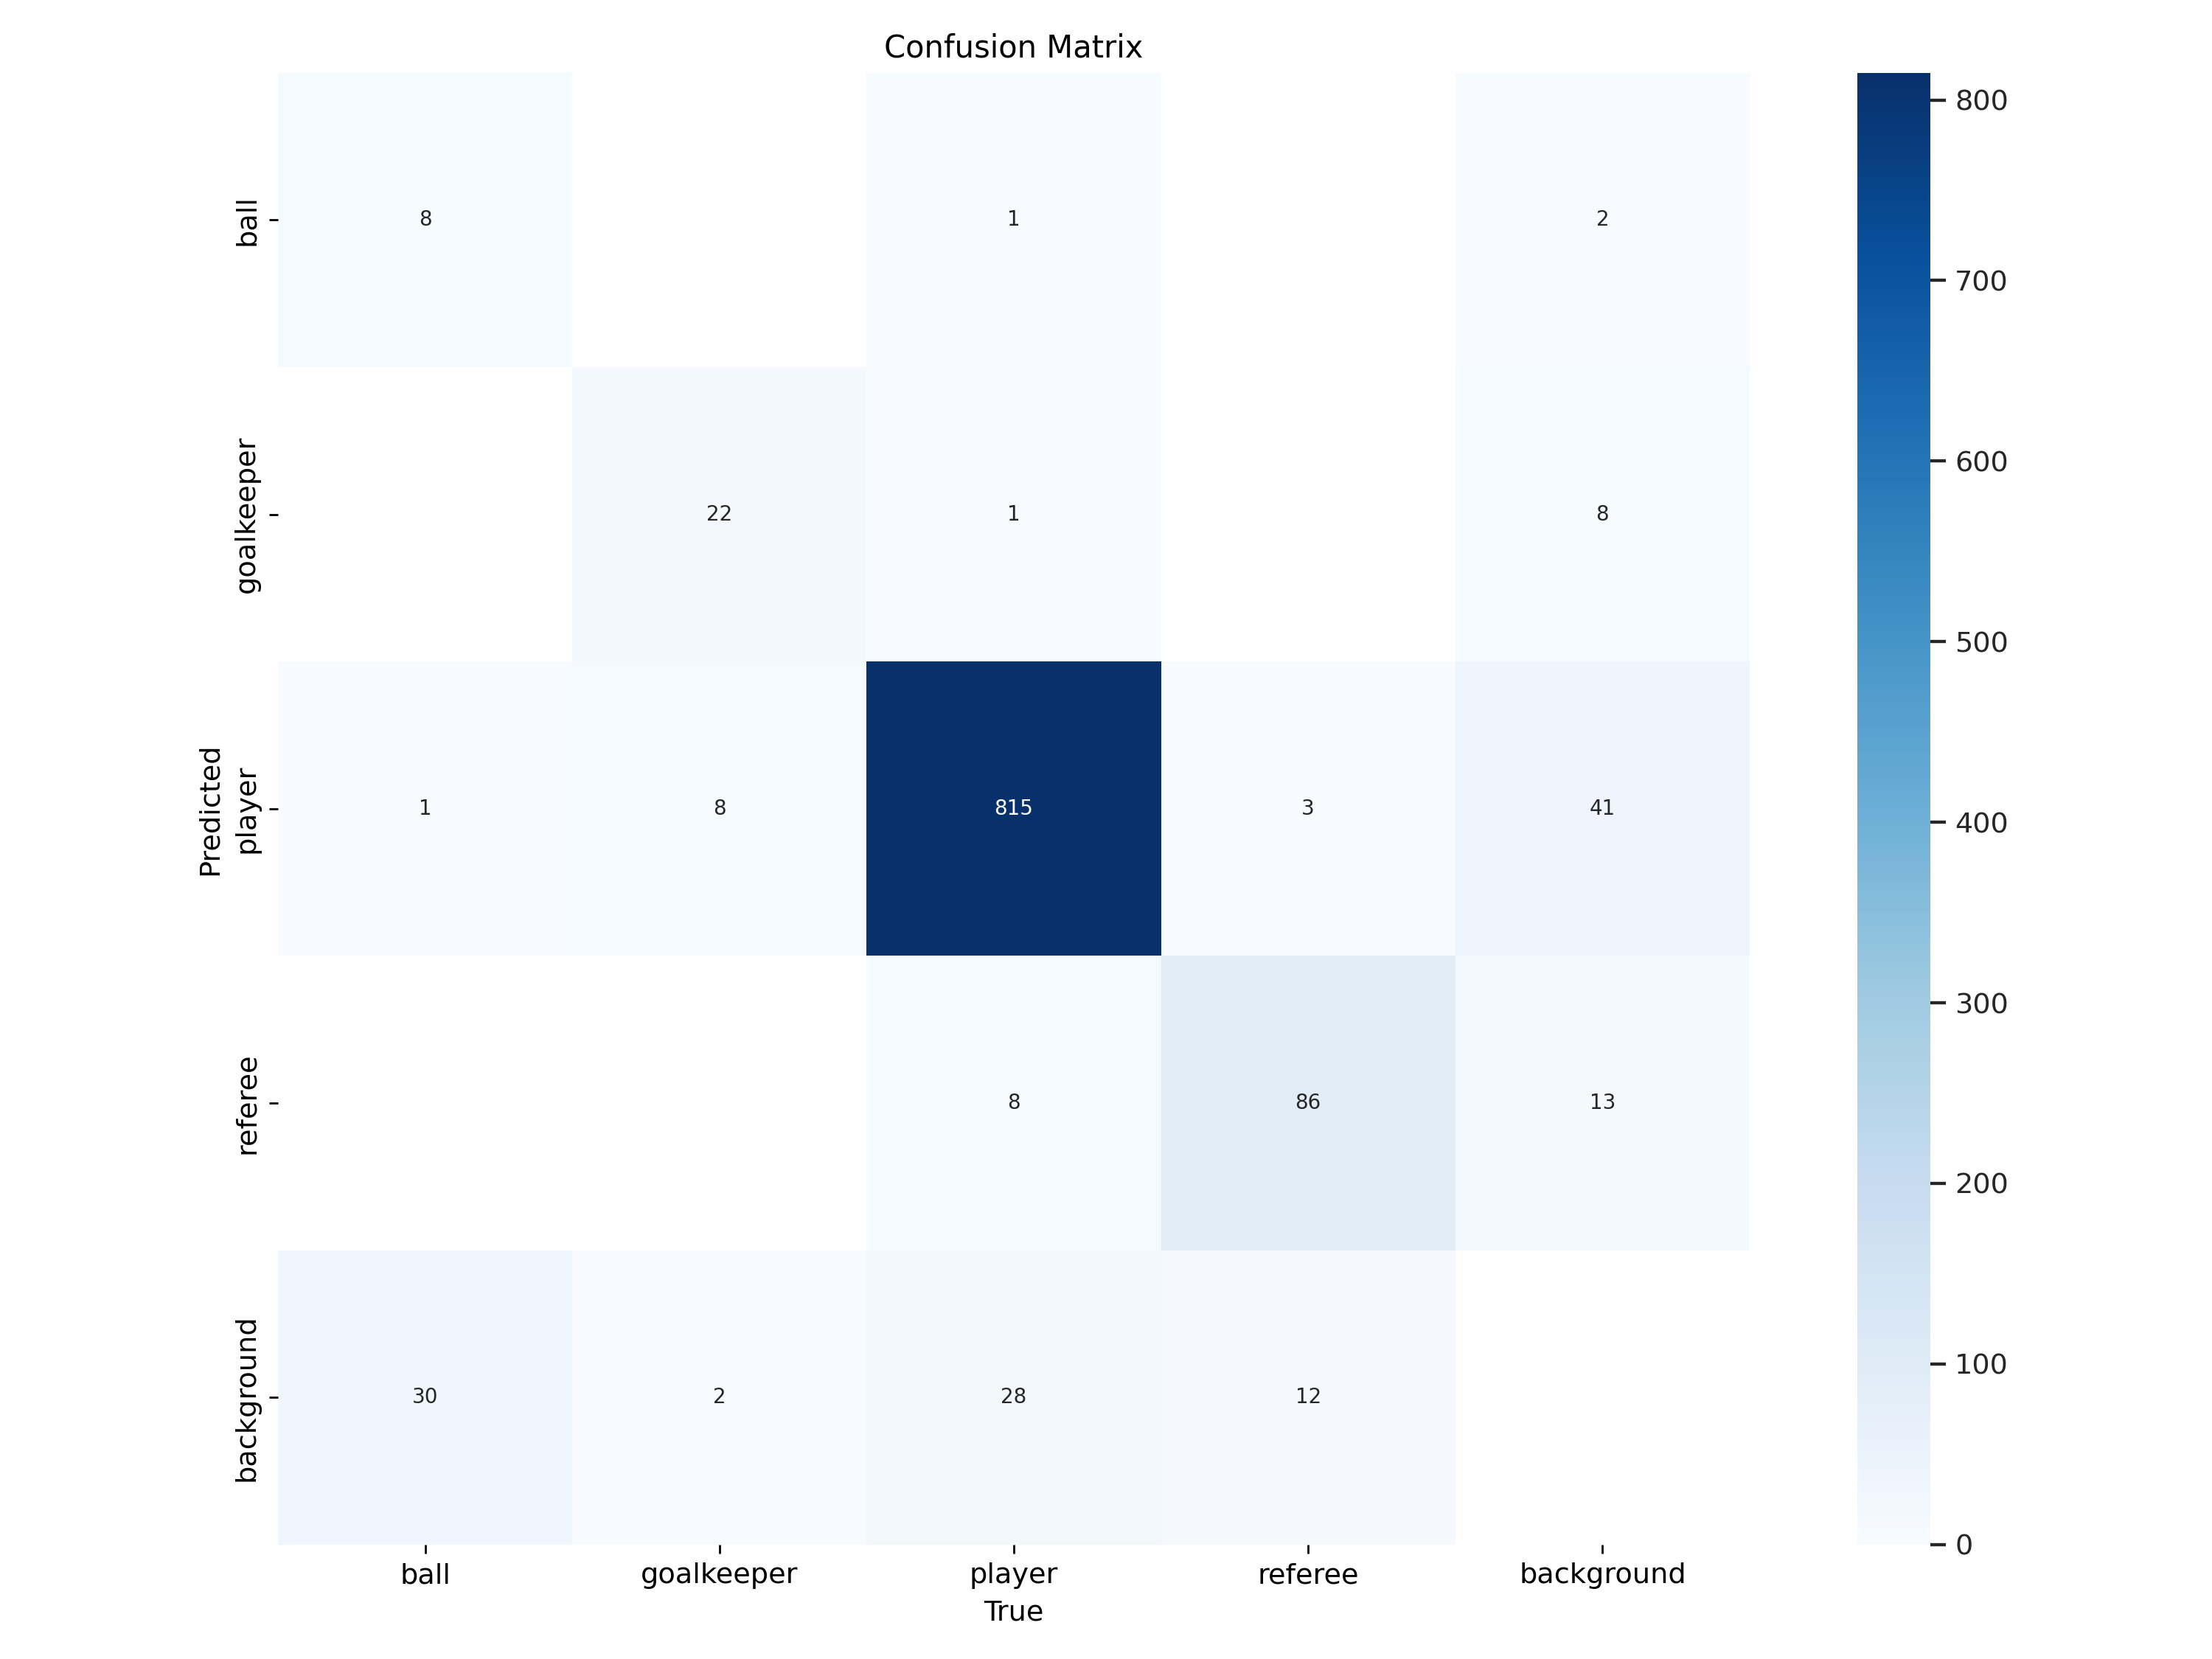

In [9]:
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

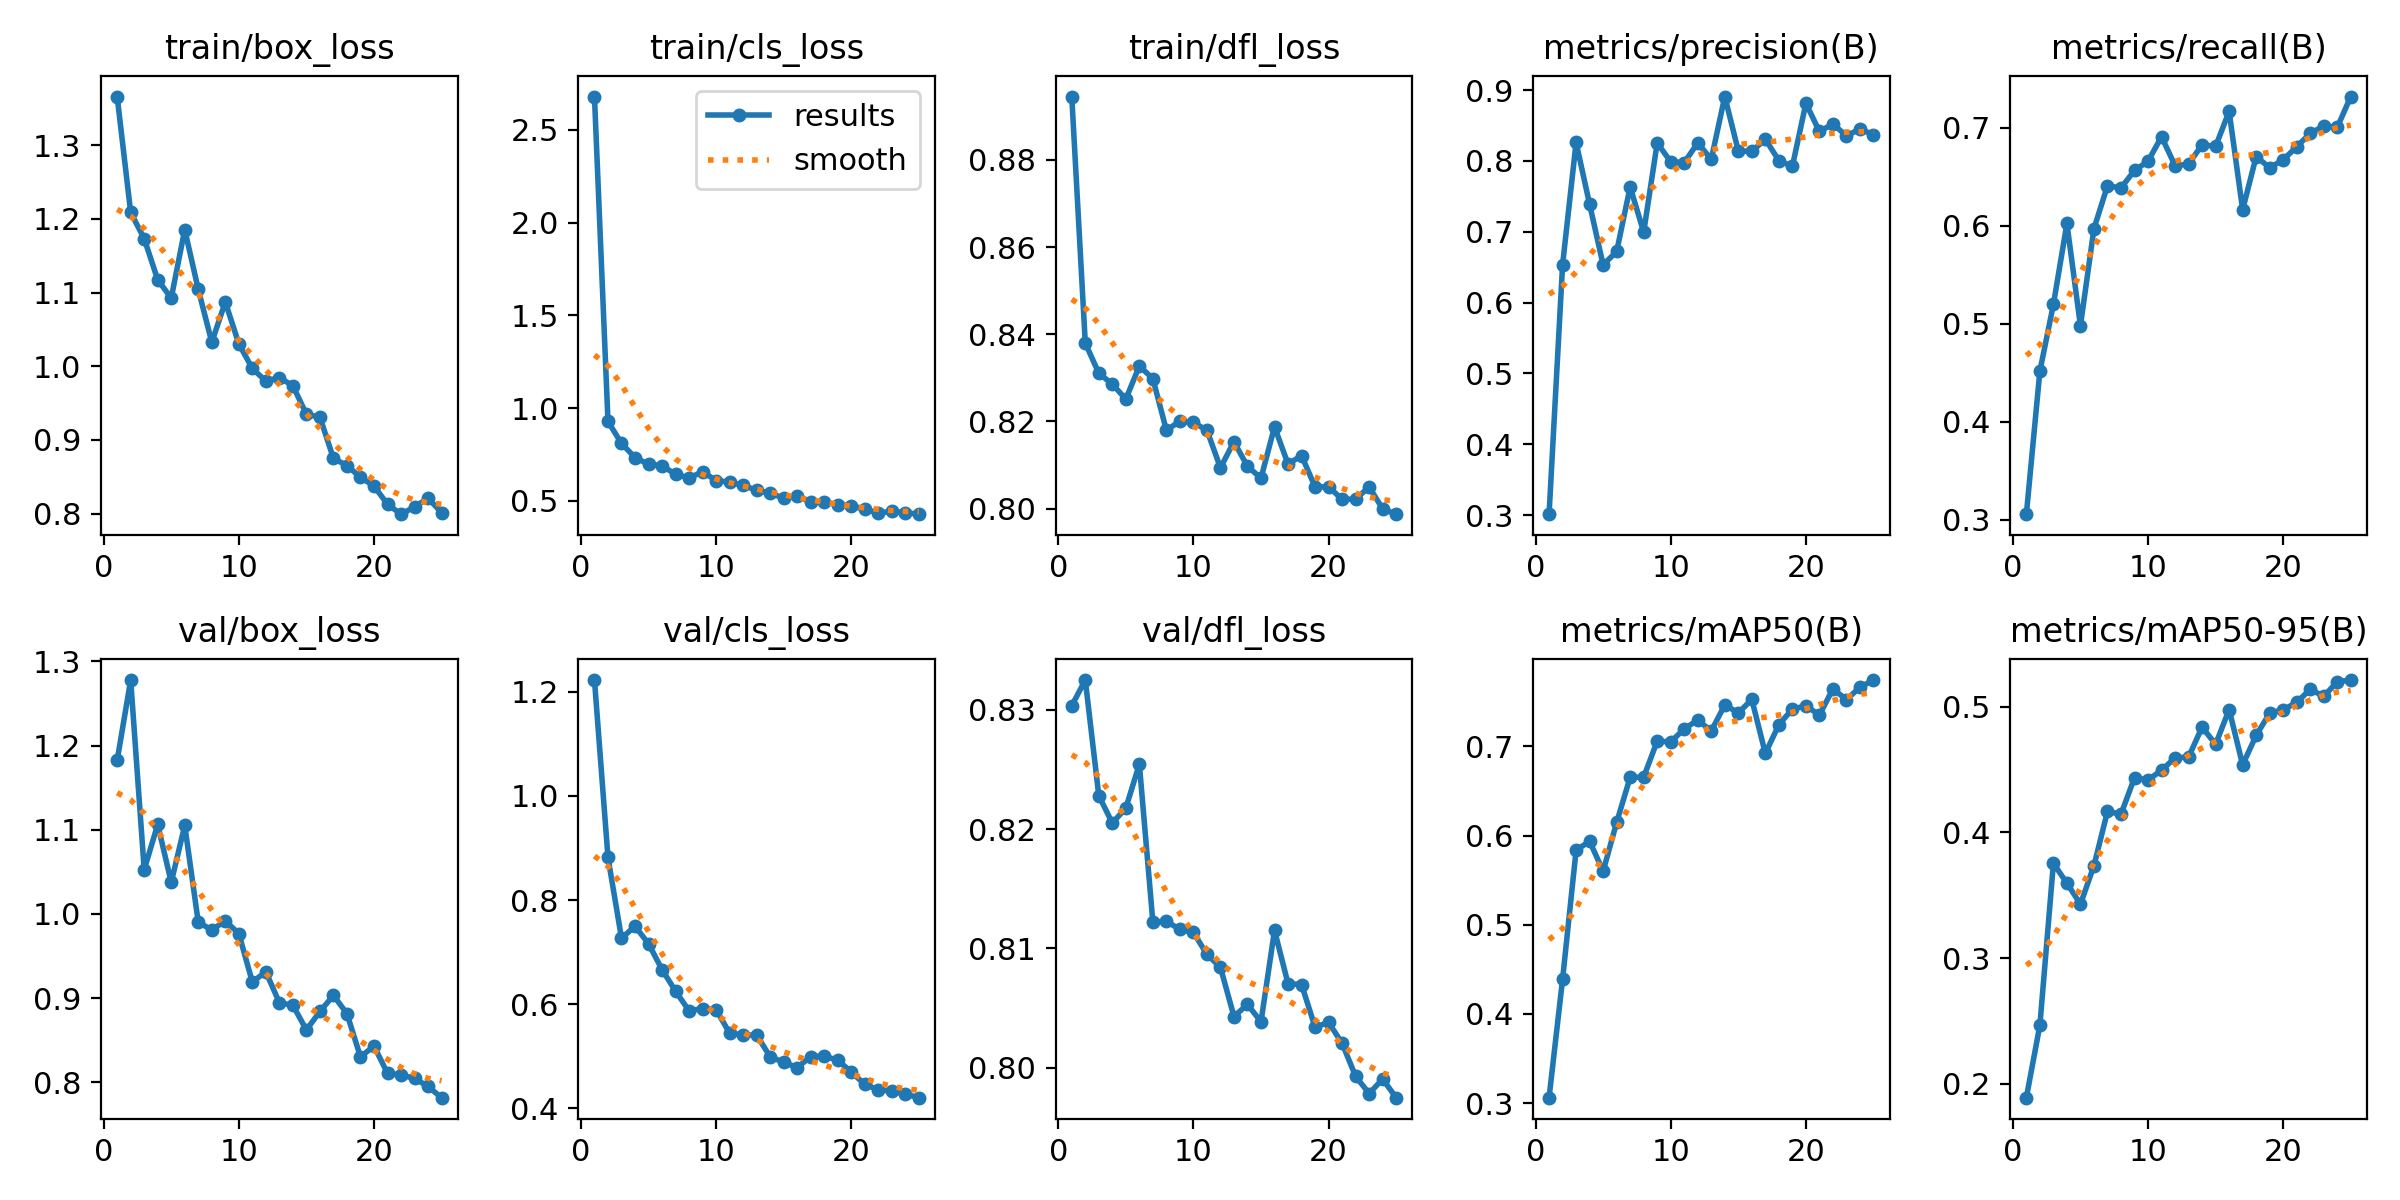

In [10]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

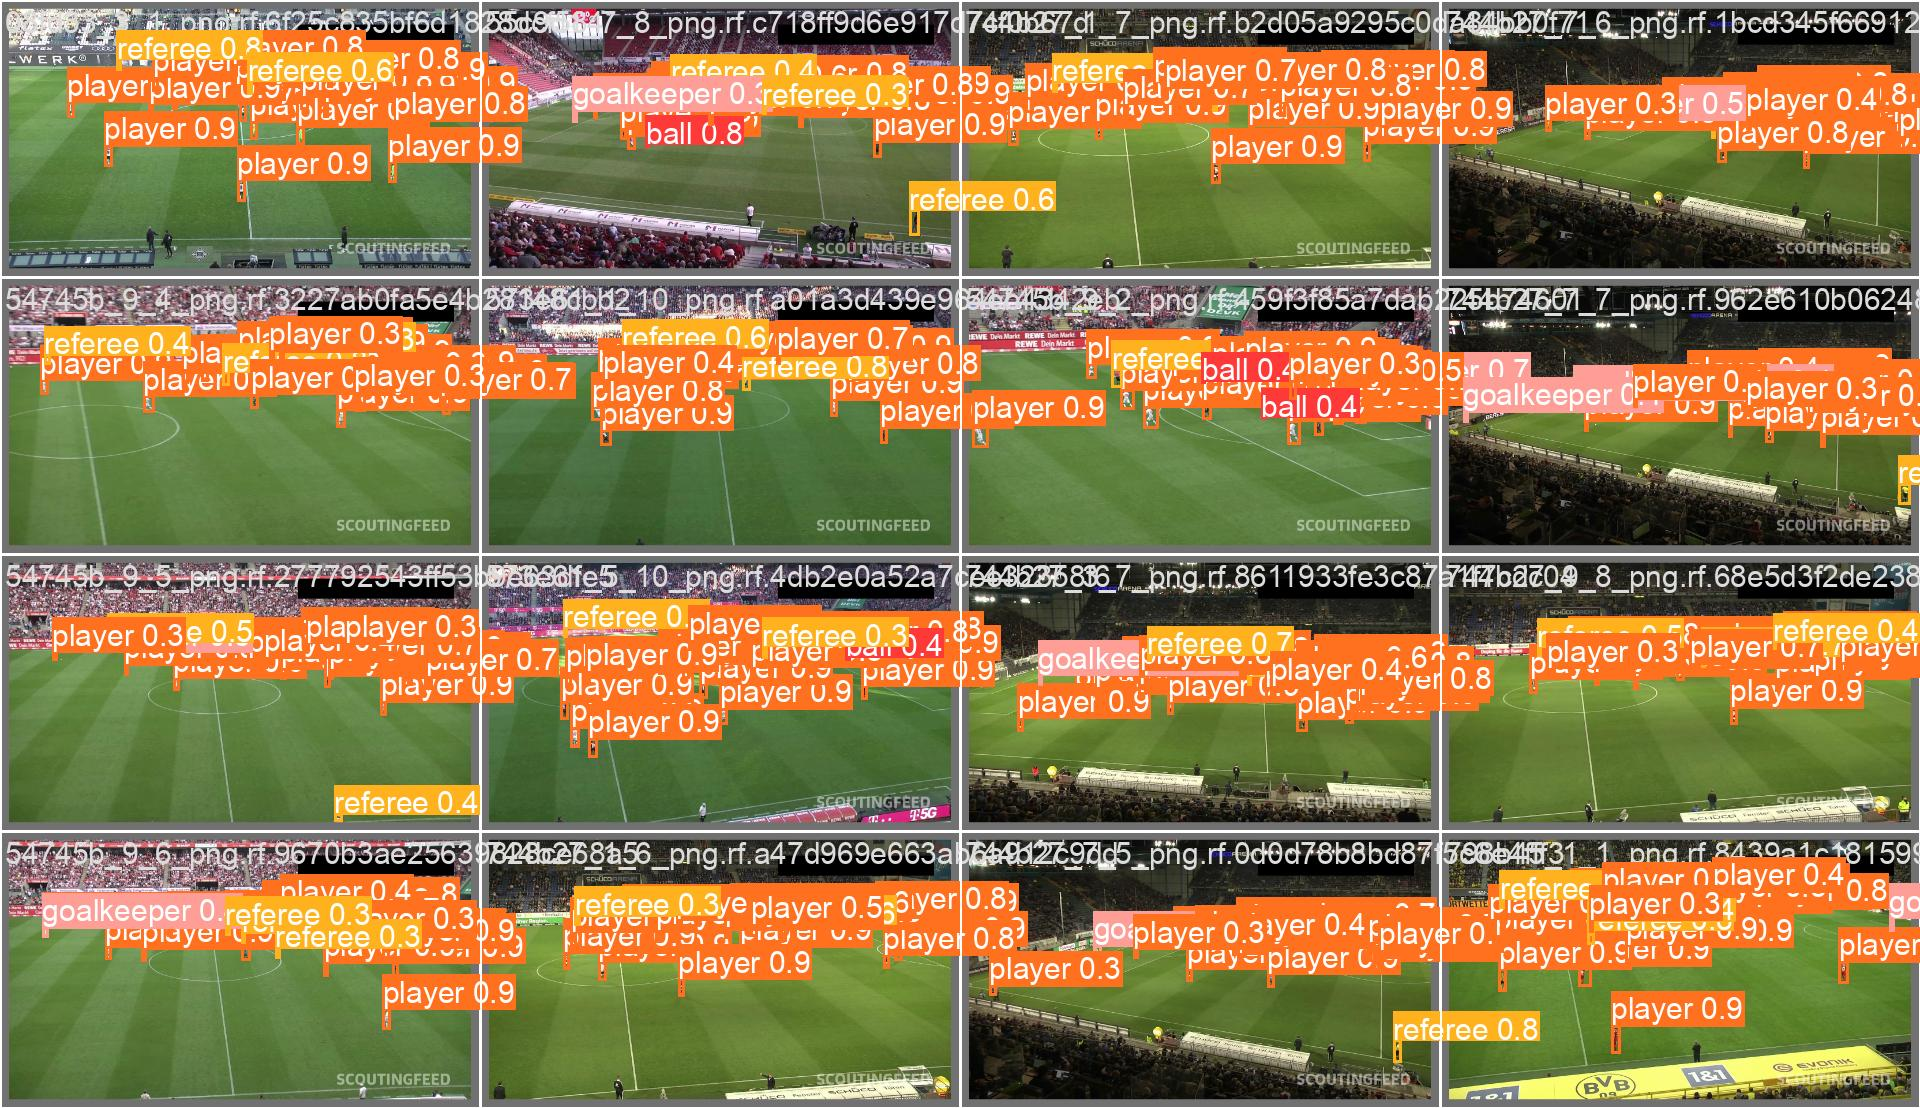

In [11]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
# Model validation
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/football-players-detection-9/valid/labels.cache... 43 images, 0 backgrounds, 0 corrupt: 100% 43/43 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:06<00:00,  2.24s/it]
                   all         43       1025      0.895      0.513      0.569      0.399
                  ball         43         39      0.873      0.179      0.226     0.0784
            goalkeeper         43         32      0.907      0.625      0.685      0.502
                player         43        853      0.942      0.625      0.714      0.575
               referee         43        101       0.86

In [14]:
# Inference
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/19 /content/football-players-detection-9/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg: 480x800 20 players, 2 referees, 84.2ms
image 2/19 /content/football-players-detection-9/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg: 480x800 1 goalkeeper, 19 players, 2 referees, 15.6ms
image 3/19 /content/football-players-detection-9/test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg: 480x800 2 balls, 1 goalkeeper, 23 players, 3 referees, 15.6ms
image 4/19 /content/football-players-detection-9/test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg: 480x800 1 goalkeeper, 18 players, 1 referee, 15.6ms
image 5/19 /content/football-players-detection-9/test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg: 480x800 1 goalkeeper, 21 players, 3 ref

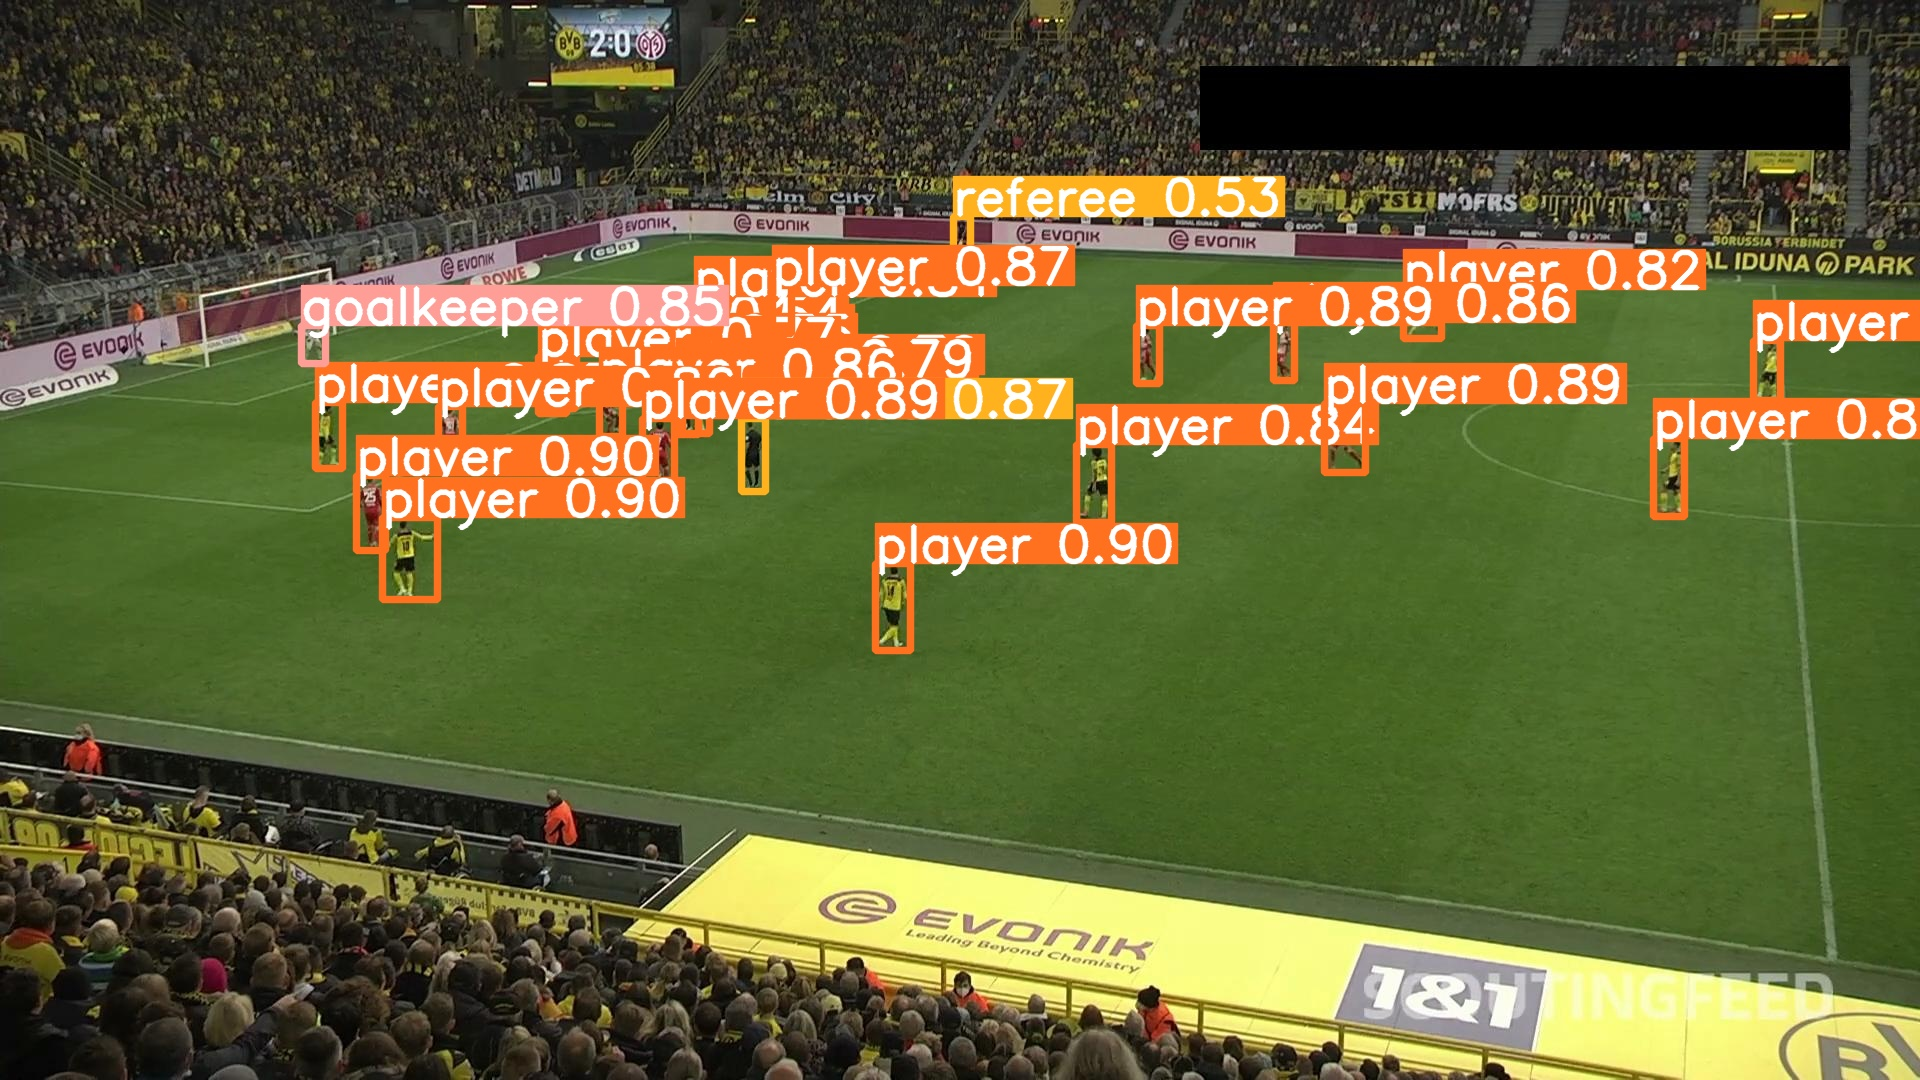

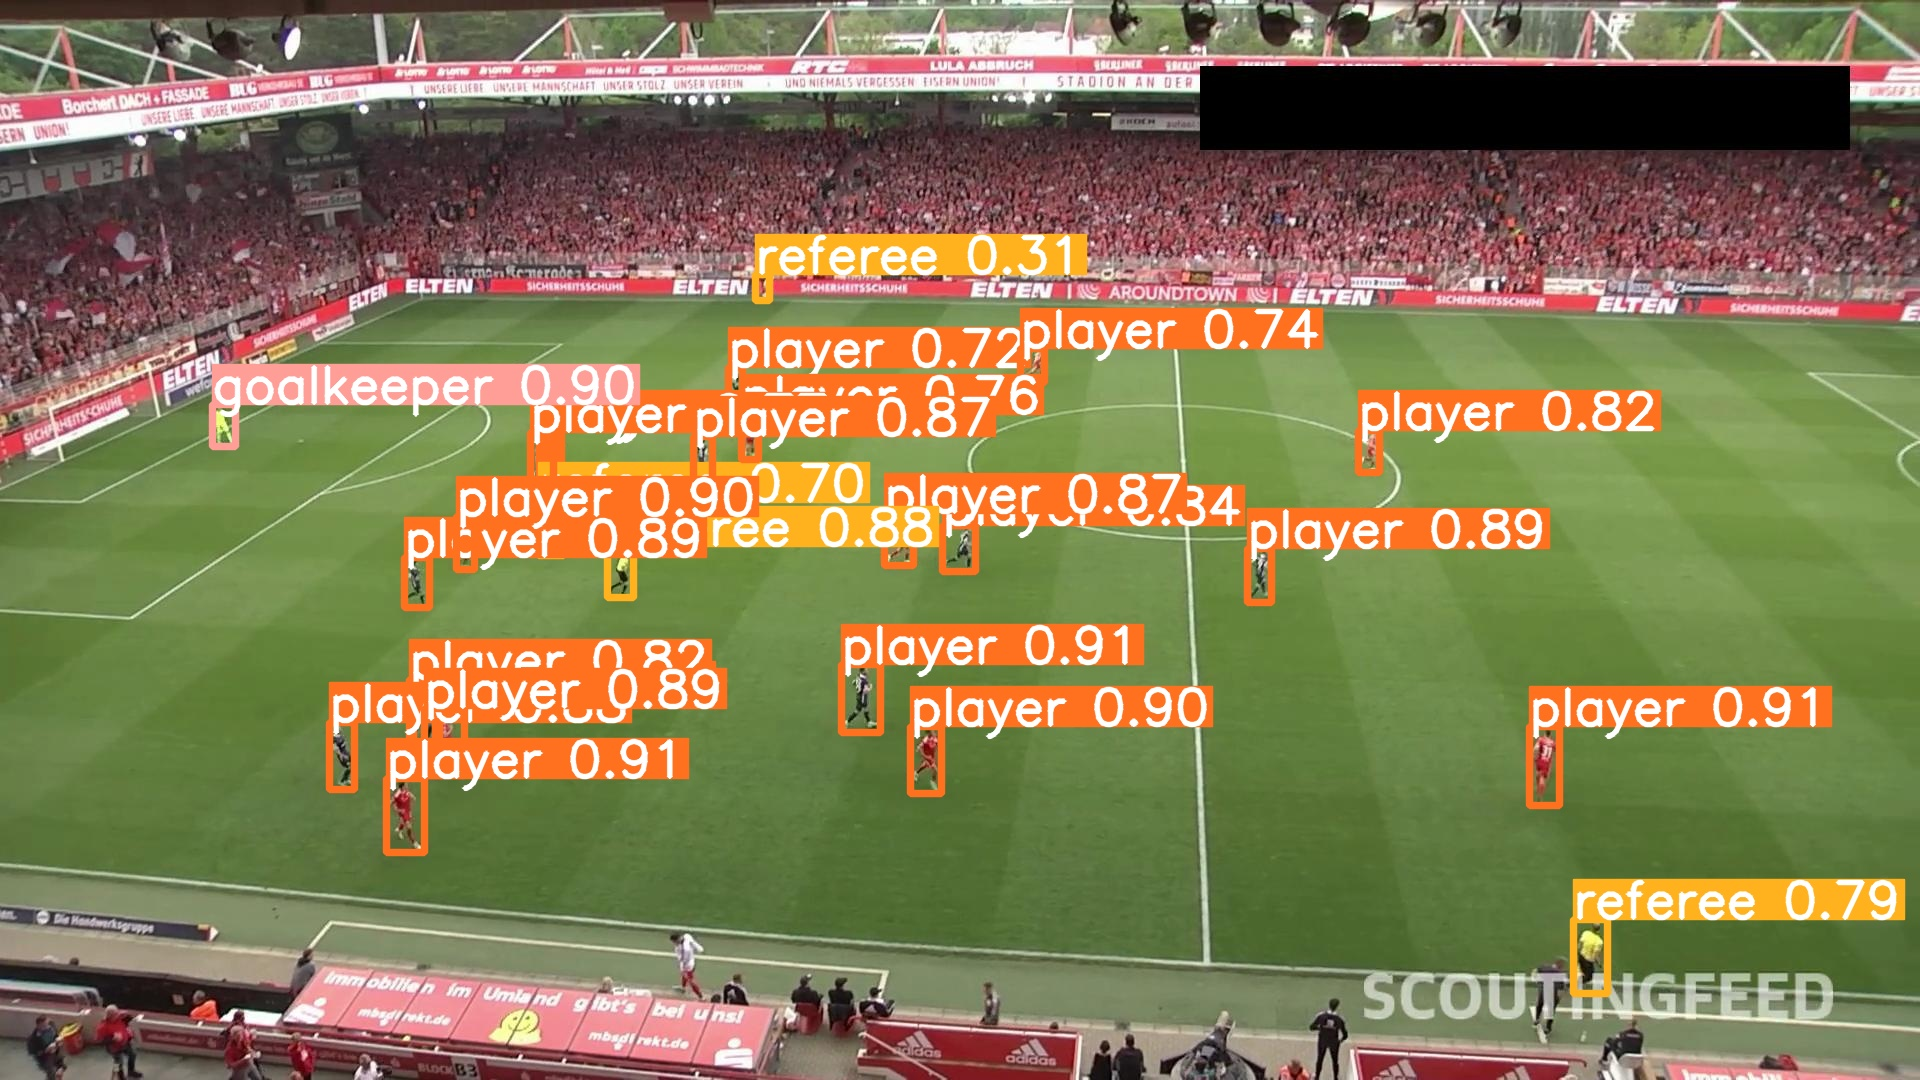

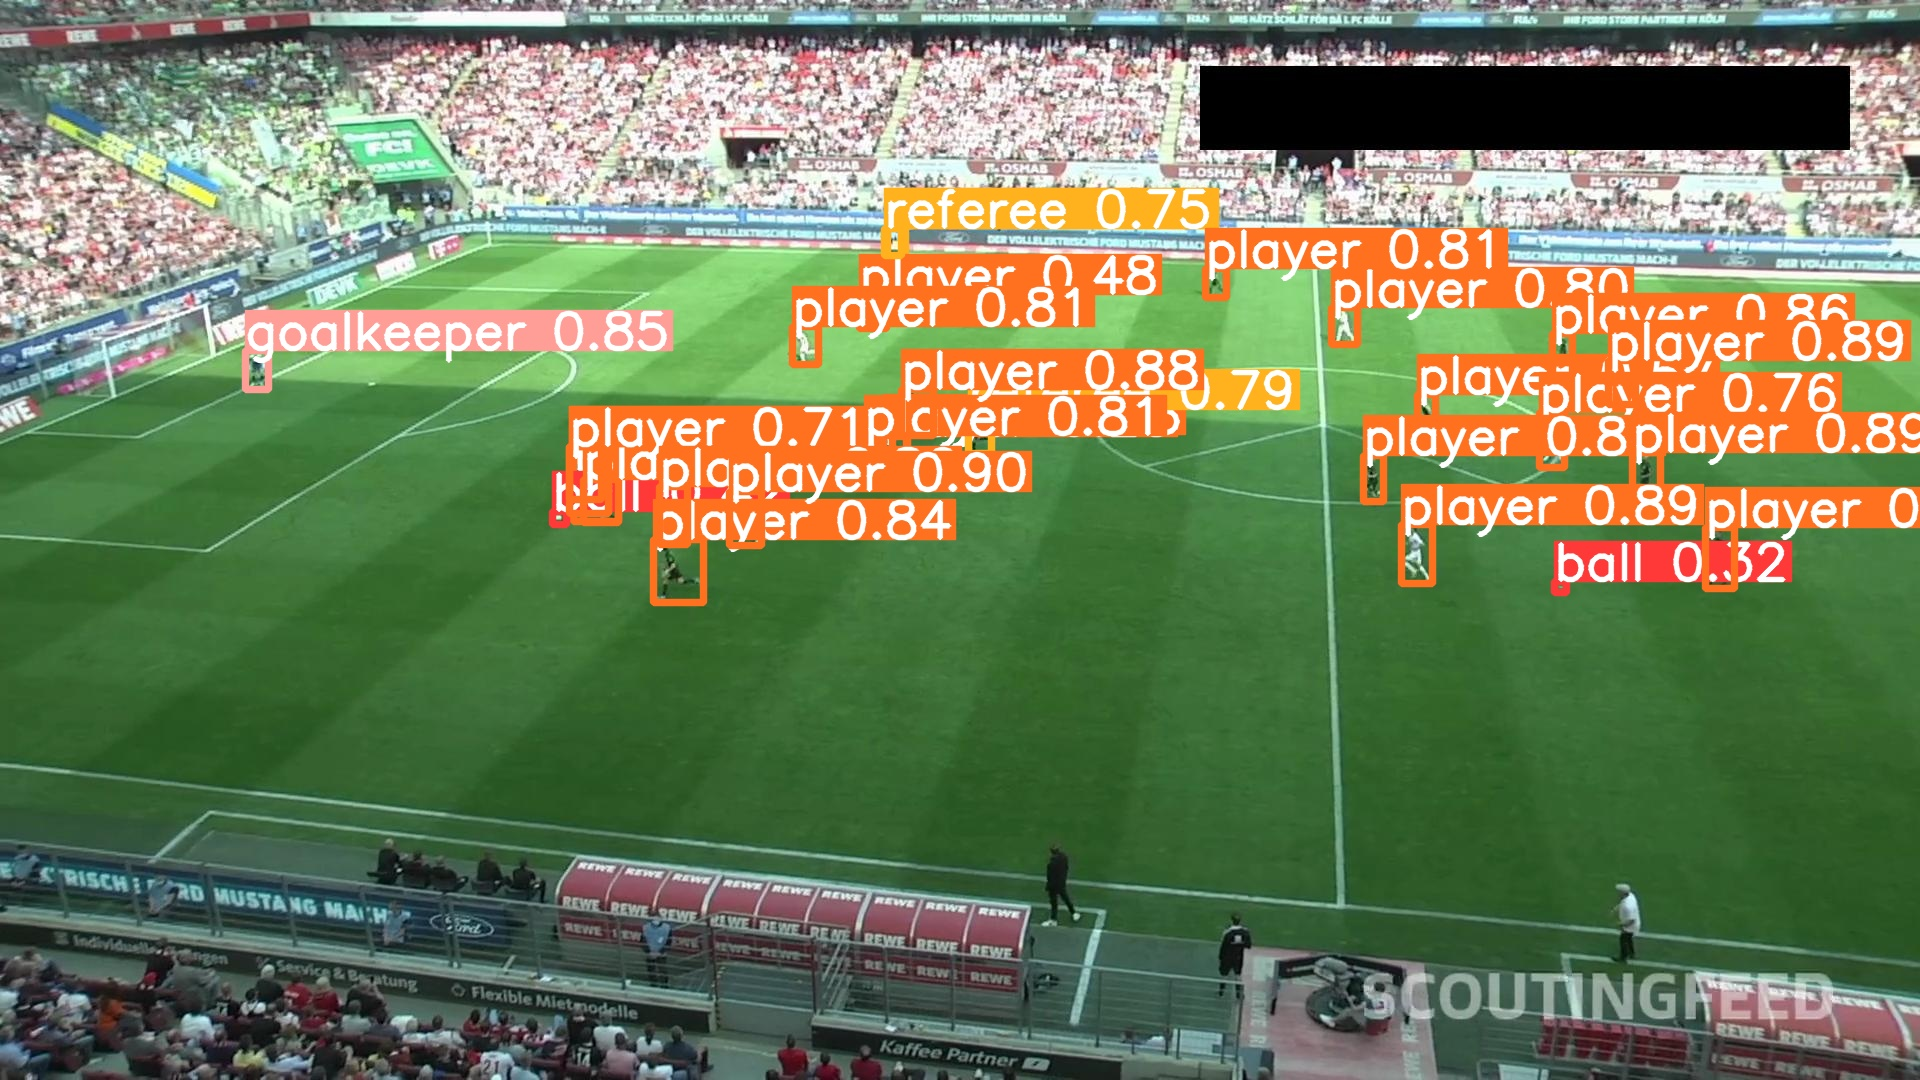

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")